# Usign NLP to classify PDF docs (Three labels - Nota, DOC and Recibos)

# Converting PDF into Image (Jpg)

# Converting Image intoText using OCR Tesseract - portuguese

In [1]:
from wand.color import Color
from wand.image import Image as Img
from PIL import Image 
import pytesseract 
import sys 
from pdf2image import convert_from_path 
from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
import os 
import cv2
import numpy as np

In [2]:
from os import listdir
from os.path import isfile, join
mypath="C:/AI/Krypton-01/jpeg"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
#Usando magik
import tempfile
import re

for file in onlyfiles:
    final = (file[len(file)-4:])
    nome  = (file[:len(file)-5])
    if final=='jpeg':
        print(nome)
        origem = "C:/AI/krypton-01/jpeg/"+nome+".jpeg"
        origem1 ="C:/AI/krypton-01/jpeg/"+nome+".png"
        destino= "C:/AI/krypton-01/texto/"+nome+".txt"
        im = Image.open(origem)
        im.save(origem1, dpi=(300, 300))
        image = cv2.imread(origem1)
        image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        retval, threshold = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
        pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
        text = pytesseract.image_to_string(threshold,lang='por')
        with open(destino, 'w',5 ,'utf-8') as text_file:
            text_file.write(text)


2018-01-03_16-26_3687490


# Merging labels and text into only one file

In [299]:
import nltk
import numpy as np
import random
import string

import bs4 as bs
import urllib.request
import re

import pandas, numpy
import pandas as pd 
import numpy as np

from nltk.corpus import webtext 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 
from random import random
from collections           import defaultdict
from gensim.models.phrases import Phrases, Phraser

df = pd.read_csv("C:/AI/krypton-01/jpeg/revisado.csv") 
##df =df.head(10000) 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  477 non-null    int64  
 1   tipo        477 non-null    object 
 2   nome        477 non-null    object 
 3   array1      0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.0+ KB


In [300]:
from os import listdir
from os.path import isfile, join
mypath = 'C:/AI/krypton-01/texto'
onlyfile1 = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfile1))

477


In [301]:
df1 = pd.DataFrame (columns = ['body','label','name','label1'])

In [302]:
for file1 in onlyfile1:
    print(file1[-3:])
    print(file1)
    print(file1[:-4])
    if file1[-3:]=="txt":
        print(file1)
        text1 = open('C:/AI/krypton-01/texto/'+file1, "r+",encoding = 'utf-8-sig').read()
        df2 = pd.DataFrame([[text1, "",file1[:-4],""]], columns = ['body','label','name','label1'])
        df1=df1.append(df2)
        df1.reset_index(inplace = True, drop = True)

txt
2018-01-03_16-26_3687490.txt
2018-01-03_16-26_3687490
2018-01-03_16-26_3687490.txt
txt
2018-01-03_16-26_4703491.txt
2018-01-03_16-26_4703491
2018-01-03_16-26_4703491.txt
txt
2018-01-03_16-26_5524444.txt
2018-01-03_16-26_5524444
2018-01-03_16-26_5524444.txt
txt
2018-01-03_16-26_6231938.txt
2018-01-03_16-26_6231938
2018-01-03_16-26_6231938.txt
txt
2018-01-03_16-27_5976388.txt
2018-01-03_16-27_5976388
2018-01-03_16-27_5976388.txt
txt
2018-02-28_17-18_9989703.txt
2018-02-28_17-18_9989703
2018-02-28_17-18_9989703.txt
txt
2018-03-01_10-17_3132133-0.txt
2018-03-01_10-17_3132133-0
2018-03-01_10-17_3132133-0.txt
txt
2018-03-01_10-17_3132133-1.txt
2018-03-01_10-17_3132133-1
2018-03-01_10-17_3132133-1.txt
txt
2018-03-02_10-01_2736574.txt
2018-03-02_10-01_2736574
2018-03-02_10-01_2736574.txt
txt
2018-03-28_14-31_8622216.txt
2018-03-28_14-31_8622216
2018-03-28_14-31_8622216.txt
txt
2018-03-28_14-38_7547926-0.txt
2018-03-28_14-38_7547926-0
2018-03-28_14-38_7547926-0.txt
txt
2018-03-28_14-38_7547

txt
2019-02-07_16-33-26-1549564406_E_1421_3912968.txt
2019-02-07_16-33-26-1549564406_E_1421_3912968
2019-02-07_16-33-26-1549564406_E_1421_3912968.txt
txt
2019-02-07_16-33-29-1549564409_E_1421_1410595.txt
2019-02-07_16-33-29-1549564409_E_1421_1410595
2019-02-07_16-33-29-1549564409_E_1421_1410595.txt
txt
2019-02-07_16-33-30-1549564410_E_1421_8054559.txt
2019-02-07_16-33-30-1549564410_E_1421_8054559
2019-02-07_16-33-30-1549564410_E_1421_8054559.txt
txt
2019-02-13_11-14-51-1550063691_CP_E_800_6845033.txt
2019-02-13_11-14-51-1550063691_CP_E_800_6845033
2019-02-13_11-14-51-1550063691_CP_E_800_6845033.txt
txt
2019-02-14_13-04-14-1550156654_E_1314_9643666-0.txt
2019-02-14_13-04-14-1550156654_E_1314_9643666-0
2019-02-14_13-04-14-1550156654_E_1314_9643666-0.txt
txt
2019-02-14_13-04-14-1550156654_E_1314_9643666-1.txt
2019-02-14_13-04-14-1550156654_E_1314_9643666-1
2019-02-14_13-04-14-1550156654_E_1314_9643666-1.txt
txt
2019-02-18_14-07-23-1550509643_CP_I_728_7224676.txt
2019-02-18_14-07-23-155050

txt
2019-03-11_08-43-08-1552304588_E_1314_4714697.txt
2019-03-11_08-43-08-1552304588_E_1314_4714697
2019-03-11_08-43-08-1552304588_E_1314_4714697.txt
txt
2019-03-11_08-45-56-1552304756_E_1314_1653181.txt
2019-03-11_08-45-56-1552304756_E_1314_1653181
2019-03-11_08-45-56-1552304756_E_1314_1653181.txt
txt
2019-03-11_08-45-56-1552304756_E_1314_2610114.txt
2019-03-11_08-45-56-1552304756_E_1314_2610114
2019-03-11_08-45-56-1552304756_E_1314_2610114.txt
txt
2019-03-11_08-45-56-1552304756_E_1314_4955564.txt
2019-03-11_08-45-56-1552304756_E_1314_4955564
2019-03-11_08-45-56-1552304756_E_1314_4955564.txt
txt
2019-03-11_08-45-56-1552304756_E_1314_6307939.txt
2019-03-11_08-45-56-1552304756_E_1314_6307939
2019-03-11_08-45-56-1552304756_E_1314_6307939.txt
txt
2019-03-11_08-45-56-1552304756_E_1314_7002355.txt
2019-03-11_08-45-56-1552304756_E_1314_7002355
2019-03-11_08-45-56-1552304756_E_1314_7002355.txt
txt
2019-03-11_08-45-56-1552304756_E_1314_8364691.txt
2019-03-11_08-45-56-1552304756_E_1314_8364691


txt
2019-04-02_13-55-07-1554224107_E_1421_8148755.txt
2019-04-02_13-55-07-1554224107_E_1421_8148755
2019-04-02_13-55-07-1554224107_E_1421_8148755.txt
txt
2019-04-02_13-55-35-1554224135_E_1421_5228515-0.txt
2019-04-02_13-55-35-1554224135_E_1421_5228515-0
2019-04-02_13-55-35-1554224135_E_1421_5228515-0.txt
txt
2019-04-02_13-55-35-1554224135_E_1421_5228515-1.txt
2019-04-02_13-55-35-1554224135_E_1421_5228515-1
2019-04-02_13-55-35-1554224135_E_1421_5228515-1.txt
txt
2019-04-02_13-55-35-1554224135_E_1421_6616554-0.txt
2019-04-02_13-55-35-1554224135_E_1421_6616554-0
2019-04-02_13-55-35-1554224135_E_1421_6616554-0.txt
txt
2019-04-02_13-55-35-1554224135_E_1421_6616554-1.txt
2019-04-02_13-55-35-1554224135_E_1421_6616554-1
2019-04-02_13-55-35-1554224135_E_1421_6616554-1.txt
txt
2019-04-02_13-55-50-1554224150_E_1421_3264066.txt
2019-04-02_13-55-50-1554224150_E_1421_3264066
2019-04-02_13-55-50-1554224150_E_1421_3264066.txt
txt
2019-04-02_14-53-49-1554227629_E_1421_5043661-0.txt
2019-04-02_14-53-49-

txt
2019-05-03_12-36-35-1556897795_E_1970_1750459.txt
2019-05-03_12-36-35-1556897795_E_1970_1750459
2019-05-03_12-36-35-1556897795_E_1970_1750459.txt
txt
2019-05-03_12-36-35-1556897795_E_1970_4714223-0.txt
2019-05-03_12-36-35-1556897795_E_1970_4714223-0
2019-05-03_12-36-35-1556897795_E_1970_4714223-0.txt
txt
2019-05-03_12-36-35-1556897795_E_1970_4714223-1.txt
2019-05-03_12-36-35-1556897795_E_1970_4714223-1
2019-05-03_12-36-35-1556897795_E_1970_4714223-1.txt
txt
2019-05-03_12-36-35-1556897795_E_1970_4714223-2.txt
2019-05-03_12-36-35-1556897795_E_1970_4714223-2
2019-05-03_12-36-35-1556897795_E_1970_4714223-2.txt
txt
2019-05-03_12-36-35-1556897795_E_1970_4714223-3.txt
2019-05-03_12-36-35-1556897795_E_1970_4714223-3
2019-05-03_12-36-35-1556897795_E_1970_4714223-3.txt
txt
2019-05-03_12-36-35-1556897795_E_1970_6056129.txt
2019-05-03_12-36-35-1556897795_E_1970_6056129
2019-05-03_12-36-35-1556897795_E_1970_6056129.txt
txt
2019-05-03_12-36-35-1556897795_E_1970_8967864-0.txt
2019-05-03_12-36-35-

txt
2019-05-30_08-45-50-1559216750_E_2007_1562447-0.txt
2019-05-30_08-45-50-1559216750_E_2007_1562447-0
2019-05-30_08-45-50-1559216750_E_2007_1562447-0.txt
txt
2019-05-30_08-45-50-1559216750_E_2007_1562447-1.txt
2019-05-30_08-45-50-1559216750_E_2007_1562447-1
2019-05-30_08-45-50-1559216750_E_2007_1562447-1.txt
txt
2019-05-30_11-56-35-1559228195_E_2007_3497441.txt
2019-05-30_11-56-35-1559228195_E_2007_3497441
2019-05-30_11-56-35-1559228195_E_2007_3497441.txt
txt
2019-05-30_12-33-26-1559230406_E_2007_4502107.txt
2019-05-30_12-33-26-1559230406_E_2007_4502107
2019-05-30_12-33-26-1559230406_E_2007_4502107.txt
txt
2019-05-30_17-02-11-1559246531_E_2007_3411404.txt
2019-05-30_17-02-11-1559246531_E_2007_3411404
2019-05-30_17-02-11-1559246531_E_2007_3411404.txt
txt
2019-05-30_17-51-00-1559249460_E_2007_6702920.txt
2019-05-30_17-51-00-1559249460_E_2007_6702920
2019-05-30_17-51-00-1559249460_E_2007_6702920.txt
txt
2019-05-31_12-21-24-1559316084_E_2007_9703231.txt
2019-05-31_12-21-24-1559316084_E_2

txt
2019-06-26_10-23-35-1561555415_I_158_4278771.txt
2019-06-26_10-23-35-1561555415_I_158_4278771
2019-06-26_10-23-35-1561555415_I_158_4278771.txt
txt
2019-06-26_10-23-35-1561555415_I_158_5773936.txt
2019-06-26_10-23-35-1561555415_I_158_5773936
2019-06-26_10-23-35-1561555415_I_158_5773936.txt
txt
2019-06-26_10-24-03-1561555443_I_158_8149615.txt
2019-06-26_10-24-03-1561555443_I_158_8149615
2019-06-26_10-24-03-1561555443_I_158_8149615.txt
txt
2019-06-26_10-24-03-1561555443_I_158_8587482-0.txt
2019-06-26_10-24-03-1561555443_I_158_8587482-0
2019-06-26_10-24-03-1561555443_I_158_8587482-0.txt
txt
2019-06-26_10-24-03-1561555443_I_158_8587482-1.txt
2019-06-26_10-24-03-1561555443_I_158_8587482-1
2019-06-26_10-24-03-1561555443_I_158_8587482-1.txt
txt
2019-06-26_10-25-05-1561555505_I_158_7800274.txt
2019-06-26_10-25-05-1561555505_I_158_7800274
2019-06-26_10-25-05-1561555505_I_158_7800274.txt
txt
2019-06-26_10-25-05-1561555505_I_158_8299586.txt
2019-06-26_10-25-05-1561555505_I_158_8299586
2019-06-

txt
2019-07-03_16-27-11-1562182031_E_1421_5709327.txt
2019-07-03_16-27-11-1562182031_E_1421_5709327
2019-07-03_16-27-11-1562182031_E_1421_5709327.txt
txt
2019-07-03_16-27-11-1562182031_E_1421_6484623.txt
2019-07-03_16-27-11-1562182031_E_1421_6484623
2019-07-03_16-27-11-1562182031_E_1421_6484623.txt
txt
2019-07-04_08-34-49-1562240089_E_1421_4939063.txt
2019-07-04_08-34-49-1562240089_E_1421_4939063
2019-07-04_08-34-49-1562240089_E_1421_4939063.txt
txt
2019-07-05_08-30-44-1562326244_I_158_1787176.txt
2019-07-05_08-30-44-1562326244_I_158_1787176
2019-07-05_08-30-44-1562326244_I_158_1787176.txt
txt
2019-07-05_08-31-10-1562326270_I_158_7240110.txt
2019-07-05_08-31-10-1562326270_I_158_7240110
2019-07-05_08-31-10-1562326270_I_158_7240110.txt
txt
2019-07-05_08-37-53-1562326673_I_158_5411893.txt
2019-07-05_08-37-53-1562326673_I_158_5411893
2019-07-05_08-37-53-1562326673_I_158_5411893.txt
txt
2019-07-05_08-38-07-1562326687_I_158_5259945.txt
2019-07-05_08-38-07-1562326687_I_158_5259945
2019-07-05_

In [303]:
df1

,body,label,name,label1
0,                                              ...,,2018-01-03_16-26_3687490,
1,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2018-01-03_16-26_4703491,
2,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2018-01-03_16-26_5524444,
3,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2018-01-03_16-26_6231938,
4,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2018-01-03_16-27_5976388,
...,...,...,...,...
472,05021201 8 Fa ntàsiikü\n\nLinha .igitávek iri|...,,Binder1-5,
473,E ana. a B radasaa S..~“A htíp a www. m: 1 E. ...,,Binder1-6,
474,_ llﬂtaliazaltlalrrriinaieEIIrIqus PREFEITURA ...,,Binder1-7,
475,28/03/2018 :: NFS-e - Nota Fiscal de Serviços ...,,Binder1-8,


In [304]:
len1=len(df)
len2=len(df1)
for i in range(len1):
    label1x=df['tipo'][i]
    file1x=df['nome'][i]
    
    for i1 in range(len2):
        file2x=df1['name'][i1]
    
        if file1x==file2x:
            print(file1x)
            print(file2x)
            df1['label'][i1]=label1x
            if df1['label'][i1]=='NOTA':
                df1['label1'][i1]=0
            if df1['label'][i1]=='DOC':
                df1['label1'][i1]=1
            if df1['label'][i1]=='RECIBO':
                df1['label1'][i1]=2

2018-01-03_16-26_3687490
2018-01-03_16-26_3687490
2018-01-03_16-26_4703491
2018-01-03_16-26_4703491
2018-01-03_16-26_5524444
2018-01-03_16-26_5524444
2018-01-03_16-26_6231938
2018-01-03_16-26_6231938
2018-01-03_16-27_5976388
2018-01-03_16-27_5976388
2018-02-28_17-18_9989703
2018-02-28_17-18_9989703
2018-03-01_10-17_3132133-0
2018-03-01_10-17_3132133-0
2018-03-01_10-17_3132133-1
2018-03-01_10-17_3132133-1
2018-03-02_10-01_2736574
2018-03-02_10-01_2736574
2018-03-28_14-31_8622216
2018-03-28_14-31_8622216
2018-03-28_14-38_7547926-0
2018-03-28_14-38_7547926-0
2018-03-28_14-38_7547926-1
2018-03-28_14-38_7547926-1
2018-04-03_09-31_2771237
2018-04-03_09-31_2771237
2018-04-04_12-55_8373498
2018-04-04_12-55_8373498
2018-04-04_13-06_1440297
2018-04-04_13-06_1440297
2018-04-20_17-01_9523594
2018-04-20_17-01_9523594
2018-04-30_15-35_2921528
2018-04-30_15-35_2921528
2018-04-30_17-01_1797878-0
2018-04-30_17-01_1797878-0
2018-04-30_17-01_1797878-1
2018-04-30_17-01_1797878-1
2018-06-07_11-05_9763679
2

2019-03-11_07-29-34-1552300174_E_1314_4334840
2019-03-11_07-29-34-1552300174_E_1314_4334840
2019-03-11_07-29-34-1552300174_E_1314_6766688
2019-03-11_07-29-34-1552300174_E_1314_6766688
2019-03-11_07-29-34-1552300174_E_1314_6813938
2019-03-11_07-29-34-1552300174_E_1314_6813938
2019-03-11_07-29-34-1552300174_E_1314_9258137
2019-03-11_07-29-34-1552300174_E_1314_9258137
2019-03-11_07-34-43-1552300483_E_1314_8558166
2019-03-11_07-34-43-1552300483_E_1314_8558166
2019-03-11_07-45-42-1552301142_E_1314_1650960
2019-03-11_07-45-42-1552301142_E_1314_1650960
2019-03-11_07-45-42-1552301142_E_1314_5475095
2019-03-11_07-45-42-1552301142_E_1314_5475095
2019-03-11_07-55-30-1552301730_E_1314_1125404
2019-03-11_07-55-30-1552301730_E_1314_1125404
2019-03-11_07-55-31-1552301731_E_1314_9069612
2019-03-11_07-55-31-1552301731_E_1314_9069612
2019-03-11_07-55-31-1552301731_E_1314_9774246
2019-03-11_07-55-31-1552301731_E_1314_9774246
2019-03-11_07-55-52-1552301752_E_1314_6989300
2019-03-11_07-55-52-1552301752_E_1

2019-04-02_14-54-20-1554227660_E_1421_5384393
2019-04-02_14-54-20-1554227660_E_1421_5384393
2019-04-03_16-00-14-1554318014_I_158_1930363
2019-04-03_16-00-14-1554318014_I_158_1930363
2019-04-03_16-00-14-1554318014_I_158_4682641
2019-04-03_16-00-14-1554318014_I_158_4682641
2019-04-03_16-00-14-1554318014_I_158_7930046
2019-04-03_16-00-14-1554318014_I_158_7930046
2019-04-03_16-00-14-1554318014_I_158_8149713
2019-04-03_16-00-14-1554318014_I_158_8149713
2019-04-03_16-00-14-1554318014_I_158_8416949
2019-04-03_16-00-14-1554318014_I_158_8416949
2019-04-03_16-00-14-1554318014_I_158_8888174
2019-04-03_16-00-14-1554318014_I_158_8888174
2019-04-03_16-00-14-1554318014_I_158_9477807
2019-04-03_16-00-14-1554318014_I_158_9477807
2019-04-03_16-00-14-1554318014_I_158_9947377
2019-04-03_16-00-14-1554318014_I_158_9947377
2019-04-03_16-00-15-1554318015_I_158_3743417
2019-04-03_16-00-15-1554318015_I_158_3743417
2019-04-03_16-00-15-1554318015_I_158_5345545
2019-04-03_16-00-15-1554318015_I_158_5345545
2019-04-

2019-05-21_15-58-13-1558465093_E_1421_6524231
2019-05-21_15-58-13-1558465093_E_1421_6524231
2019-05-21_15-58-28-1558465108_E_1421_7767694
2019-05-21_15-58-28-1558465108_E_1421_7767694
2019-05-23_08-32-25-1558611145_E_2007_4173881
2019-05-23_08-32-25-1558611145_E_2007_4173881
2019-05-27_10-24-33-1558963473_E_2007_6632957
2019-05-27_10-24-33-1558963473_E_2007_6632957
2019-05-27_10-24-33-1558963473_E_2007_9225051
2019-05-27_10-24-33-1558963473_E_2007_9225051
2019-05-27_14-52-47-1558979567_E_1314_6870599
2019-05-27_14-52-47-1558979567_E_1314_6870599
2019-05-27_15-05-09-1558980309_E_2007_5977308
2019-05-27_15-05-09-1558980309_E_2007_5977308
2019-05-27_15-05-09-1558980309_E_2007_8844041
2019-05-27_15-05-09-1558980309_E_2007_8844041
2019-05-28_08-43-42-1559043822_E_2007_8814620
2019-05-28_08-43-42-1559043822_E_2007_8814620
2019-05-30_08-45-50-1559216750_E_2007_1562447-0
2019-05-30_08-45-50-1559216750_E_2007_1562447-0
2019-05-30_08-45-50-1559216750_E_2007_1562447-1
2019-05-30_08-45-50-15592167

2019-06-26_11-02-22-1561557742_I_158_5818815-2
2019-06-26_11-02-22-1561557742_I_158_5818815-2
2019-06-27_10-50-54-1561643454_E_1314_7593164-0
2019-06-27_10-50-54-1561643454_E_1314_7593164-0
2019-06-27_10-50-54-1561643454_E_1314_7593164-1
2019-06-27_10-50-54-1561643454_E_1314_7593164-1
2019-06-27_10-56-56-1561643816_E_1314_1630944-0
2019-06-27_10-56-56-1561643816_E_1314_1630944-0
2019-06-27_10-56-56-1561643816_E_1314_1630944-1
2019-06-27_10-56-56-1561643816_E_1314_1630944-1
2019-06-27_11-00_CP_E_1314__5080130
2019-06-27_11-00_CP_E_1314__5080130
2019-06-27_16-27-53-1561663673_E_2007_2119707
2019-06-27_16-27-53-1561663673_E_2007_2119707
2019-06-27_16-33-48-1561664028_E_1421_1117341
2019-06-27_16-33-48-1561664028_E_1421_1117341
2019-06-27_16-39-49-1561664389_E_2007_2396771
2019-06-27_16-39-49-1561664389_E_2007_2396771
2019-06-28_13-19-58-1561738798_E_1421_1320953
2019-06-28_13-19-58-1561738798_E_1421_1320953
2019-07-01_14-08-33-1562000913_E_1421_6164334
2019-07-01_14-08-33-1562000913_E_142

In [305]:
df1

,body,label,name,label1
0,                                              ...,NOTA,2018-01-03_16-26_3687490,0
1,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_4703491,0
2,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_5524444,0
3,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_6231938,0
4,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-27_5976388,0
...,...,...,...,...
472,05021201 8 Fa ntàsiikü\n\nLinha .igitávek iri|...,DOC,Binder1-5,1
473,E ana. a B radasaa S..~“A htíp a www. m: 1 E. ...,DOC,Binder1-6,1
474,_ llﬂtaliazaltlalrrriinaieEIIrIqus PREFEITURA ...,NOTA,Binder1-7,0
475,28/03/2018 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,Binder1-8,0


# Creating a balanced file

In [306]:
df3 = pd.DataFrame (columns = ['body','label','name','label1'])

In [307]:
import random
a=0
b=0
c = 0
sample = 1000
while a<sample or b<sample or c<sample:
    c1=(random.randint(0, 475))
    BODYY  = df1['body'][c1]                      
    NAMEY  = df1['name'][c1]
    LABELY = df1['label'][c1]                    
    LABEL1Y = df1['label1'][c1]                  
       
    if (df1['label'][c1] == "NOTA") and (a<sample):
        a=a+1 
        print('a=',a)
        df3 = df3.append(pd.DataFrame([[BODYY,LABELY,NAMEY,LABEL1Y]], columns=df3.columns))
    if df1['label'][c1]== "DOC" and b<sample:
        b=b+1
        df3 = df3.append(pd.DataFrame([[BODYY,LABELY,NAMEY,LABEL1Y]], columns=df3.columns))
        ##print('b=',b)
    if df1['label'][c1]== "RECIBO" and c<sample:
        c=c+1
        df3 = df3.append(pd.DataFrame([[BODYY,LABELY,NAMEY,LABEL1Y]], columns=df3.columns))
        ##print('b=',b)
df3.reset_index(inplace = True, drop = True)

a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
a= 37
a= 38
a= 39
a= 40
a= 41
a= 42
a= 43
a= 44
a= 45
a= 46
a= 47
a= 48
a= 49
a= 50
a= 51
a= 52
a= 53
a= 54
a= 55
a= 56
a= 57
a= 58
a= 59
a= 60
a= 61
a= 62
a= 63
a= 64
a= 65
a= 66
a= 67
a= 68
a= 69
a= 70
a= 71
a= 72
a= 73
a= 74
a= 75
a= 76
a= 77
a= 78
a= 79
a= 80
a= 81
a= 82
a= 83
a= 84
a= 85
a= 86
a= 87
a= 88
a= 89
a= 90
a= 91
a= 92
a= 93
a= 94
a= 95
a= 96
a= 97
a= 98
a= 99
a= 100
a= 101
a= 102
a= 103
a= 104
a= 105
a= 106
a= 107
a= 108
a= 109
a= 110
a= 111
a= 112
a= 113
a= 114
a= 115
a= 116
a= 117
a= 118
a= 119
a= 120
a= 121
a= 122
a= 123
a= 124
a= 125
a= 126
a= 127
a= 128
a= 129
a= 130
a= 131
a= 132
a= 133
a= 134
a= 135
a= 136
a= 137
a= 138
a= 139
a= 140
a= 141
a= 142
a= 143
a= 144
a= 145
a= 146
a= 147
a= 148
a= 149
a= 150
a= 151
a= 152
a= 153
a= 154
a= 155
a= 156
a= 157
a= 158
a=

In [308]:
df3

,body,label,name,label1
0,07/06/2018 NFSe BeIO Horizonte - N°: 2018/453\...,NOTA,Binder1-18,0
1,Vêm Prefeitura Municipal de Colatina\nE SECRET...,NOTA,2019-03-11_07-55-31-1552301731_E_1314_9069612,0
2,Empresa certiñcada com o selo de qualidade ISO...,RECIBO,2019-07-03_14-18-50-1562174330_E_2007_4608740,2
3,'N-U'ia F550551 Eletrônica\n\n \n\n \n\n...,NOTA,2019-06-28_13-19-58-1561738798_E_1421_1320953,0
4,\n\n \n\nGaõí 201 103549104014\nI I -\n- . ...,DOC,2019-04-02_14-53-49-1554227629_E_1421_5043661-0,1
...,...,...,...,...
2995,\n\nÉ escritorlos .rede\nRecibo\n\nRecebemo...,RECIBO,2019-03-20_10-46-40-1553089600_E_1421_4059548,2
2996,RECIBO DE ALUGUEL E IPTU\n\nRecebi da empresa ...,RECIBO,2019-03-21_16-58-28-1553198308_E_1421_8806296,2
2997,\n\n \n\nRêúebefmâ de TECMSUMÀ cøMÉRciG E maú...,RECIBO,2019-05-21_15-58-13-1558465093_E_1421_6524231,2
2998,RECIBO DE ALUGUEL E IPTU\nE\n\nRecebi da empre...,RECIBO,2018-12-20_14-12-41-1545322361_E_1421_8559516-0,2


In [309]:
df3

,body,label,name,label1
0,07/06/2018 NFSe BeIO Horizonte - N°: 2018/453\...,NOTA,Binder1-18,0
1,Vêm Prefeitura Municipal de Colatina\nE SECRET...,NOTA,2019-03-11_07-55-31-1552301731_E_1314_9069612,0
2,Empresa certiñcada com o selo de qualidade ISO...,RECIBO,2019-07-03_14-18-50-1562174330_E_2007_4608740,2
3,'N-U'ia F550551 Eletrônica\n\n \n\n \n\n...,NOTA,2019-06-28_13-19-58-1561738798_E_1421_1320953,0
4,\n\n \n\nGaõí 201 103549104014\nI I -\n- . ...,DOC,2019-04-02_14-53-49-1554227629_E_1421_5043661-0,1
...,...,...,...,...
2995,\n\nÉ escritorlos .rede\nRecibo\n\nRecebemo...,RECIBO,2019-03-20_10-46-40-1553089600_E_1421_4059548,2
2996,RECIBO DE ALUGUEL E IPTU\n\nRecebi da empresa ...,RECIBO,2019-03-21_16-58-28-1553198308_E_1421_8806296,2
2997,\n\n \n\nRêúebefmâ de TECMSUMÀ cøMÉRciG E maú...,RECIBO,2019-05-21_15-58-13-1558465093_E_1421_6524231,2
2998,RECIBO DE ALUGUEL E IPTU\nE\n\nRecebi da empre...,RECIBO,2018-12-20_14-12-41-1545322361_E_1421_8559516-0,2


# Cleaning the text

In [310]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    3000 non-null   object
 1   label   3000 non-null   object
 2   name    3000 non-null   object
 3   label1  3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB


In [311]:
# create function for removing special caracters
import html
import re
def clean(s):
    s = html.unescape(s)
    s = s.replace("\\n"," ")
    s = s.replace("_NEG","")
    s = s.replace("_NEGFIRST", "")
    s = re.sub(r"_", "", s)
    s = re.sub(r"#", "", s)
    s = re.sub(r"\*", "", s)
    s = re.sub(r"\'s", "", s)
    s = re.sub(r"\'m", " am", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'d", " would", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r",", "", s)
    s = re.sub(r"!", " !", s)
    s = re.sub(r"\(", "", s)
    s = re.sub(r"\)", "", s)
    s = re.sub(r"\?", " ?", s)
    s = re.sub(r'[^\x00-\x7F]',' ', s)
    s = re.sub(r'[^\w\s]',' ',s)
    s = re.sub("\d+", " ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = s.rstrip(',|.|;|:|\'|\"')
    s = s.lstrip('\'|\"')

    return str(s)

In [312]:
# apply clean function to body
for i in range(len(df3)):
      df3["body"][i]= clean(str(df3["body"][i]))
      print(i,df3['name'][i])

0 Binder1-18
1 2019-03-11_07-55-31-1552301731_E_1314_9069612
2 2019-07-03_14-18-50-1562174330_E_2007_4608740
3 2019-06-28_13-19-58-1561738798_E_1421_1320953
4 2019-04-02_14-53-49-1554227629_E_1421_5043661-0
5 2019-06-26_10-31-54-1561555914_I_158_6222222
6 2018-08-23_17-24_4325695
7 2019-07-03_14-18-50-1562174330_E_2007_6036370
8 2019-07-03_16-27-11-1562182031_E_1421_5363169
9 Binder1-14
10 2019-06-25_14-58-46-1561485526_E_1421_1659223
11 2018-11-22_15-02_CP_I_728__6316307
12 2019-03-07_11-48-04-1551970084_E_1421_4873454
13 2019-03-11_08-30-36-1552303836_E_1314_7852518
14 2019-03-11_08-53-50-1552305230_E_1314_5495991
15 2019-03-07_11-48-04-1551970084_E_1421_3799501
16 2019-06-26_10-31-22-1561555882_I_158_5368545
17 2019-04-02_13-54-53-1554224093_E_1421_2388167
18 2019-06-24_17-15-48-1561407348_E_2007_5635819
19 2019-02-13_11-14-51-1550063691_CP_E_800_6845033
20 2019-02-07_15-13-58-1549559638_E_1421_5866883
21 2018-12-05_14-50-30-1544028630_E_1314_3524479-1
22 2019-02-07_16-33-26-1549564

220 2019-05-20_17-11-48-1558383108_E_2007_4658936
221 2019-05-09_10-55-56-1557410156_E_2007_7010728
222 2019-05-03_12-36-33-1556897793_E_1970_6734682
223 2019-06-26_11-02-22-1561557742_I_158_5818815-2
224 2018-07-02_15-30_7991822
225 2019-05-16_08-09-51-1558004991_E_2007_3328160
226 2018-06-19_15-24_7898558
227 2019-03-27_08-57-09-1553687829_E_1421_2564011
228 2019-03-07_09-40-20-1551962420_E_1421_5712140
229 2019-03-11_08-53-50-1552305230_E_1314_5711845
230 2019-07-05_16-52-20-1562356340_I_158_8879165-1
231 2019-05-09_11-27-35-1557412055_E_2007_1492514
232 2018-01-03_16-26_3687490
233 Binder1-12
234 2019-03-07_09-49-01-1551962941_E_1421_9975417
235 2019-06-26_10-25-05-1561555505_I_158_7800274
236 2019-02-04_12-20-53-1549290053_E_1421_6195034
237 2019-06-26_11-02-22-1561557742_I_158_5818815-0
238 2019-03-11_07-45-42-1552301142_E_1314_5475095
239 Binder1-4
240 2019-03-07_10-09-49-1551964189_E_1421_8459753
241 2019-06-25_14-58-46-1561485526_E_1421_1659223
242 2019-05-03_12-36-28-15568977

411 2019-03-11_08-45-56-1552304756_E_1314_7002355
412 2018-08-23_17-24_4325695
413 2019-05-06_16-33-53-1557171233_E_2007_2973434
414 2019-03-20_10-40-11-1553089211_E_1421_9939818-1
415 2019-04-02_14-53-49-1554227629_E_1421_5043661-1
416 Binder1-24
417 2019-03-21_10-26-45-1553174805_E_1421_6012097
418 2019-06-26_10-31-54-1561555914_I_158_6222222
419 2018-06-07_13-40_4636502-1
420 2019-05-02_15-16-28-1556820988_E_1421_1288288
421 2019-06-06_14-27-38-1559842058_E_2007_4294459
422 2019-06-12_08-12-28-1560337948_E_2007_6076879
423 2019-03-07_09-40-20-1551962420_E_1421_8603437
424 2019-03-11_08-53-50-1552305230_E_1314_4390049
425 2019-05-03_12-36-31-1556897791_E_1970_2102950-2
426 2019-06-26_10-31-22-1561555882_I_158_3924124
427 2019-05-20_16-53-53-1558382033_E_1421_2353919
428 2019-03-11_08-53-50-1552305230_E_1314_5075073
429 Binder1-4
430 2019-03-11_08-53-50-1552305230_E_1314_8615984
431 2019-07-03_16-27-11-1562182031_E_1421_4212279
432 2018-04-04_13-06_1440297
433 2019-06-26_11-02-22-1561

659 2019-06-06_16-00-25-1559847625_E_2007_3156469
660 2019-06-26_10-25-05-1561555505_I_158_7800274
661 2019-03-11_08-53-50-1552305230_E_1314_1806091
662 2019-05-31_15-14-43-1559326483_E_1421_2894623
663 2019-07-03_14-18-50-1562174330_E_2007_4608740
664 2018-08-09_13-26_7969628
665 2019-02-04_12-20-53-1549290053_E_1421_4518567
666 2019-04-02_13-55-07-1554224107_E_1421_8148755
667 2018-03-28_14-38_7547926-0
668 2019-04-02_14-54-20-1554227660_E_1421_5384393
669 2018-03-01_10-17_3132133-1
670 2019-02-07_15-13-58-1549559638_E_1421_9137381
671 2019-06-26_08-20-58-1561548058_E_2007_1172374
672 2019-06-26_10-33-54-1561556034_I_158_3504289
673 2018-04-20_17-01_9523594
674 Binder1-18
675 2019-07-05_16-52-20-1562356340_I_158_8879165-2
676 2019-06-26_10-34-31-1561556071_I_158_7242434
677 2019-05-03_12-36-29-1556897789_E_1970_5776604
678 2018-09-25_10-54_E_1314_5000212-0
679 2019-05-31_12-21-24-1559316084_E_2007_9703231
680 2019-07-01_14-08-33-1562000913_E_1421_6164334
681 2019-05-20_16-54-42-15583

840 2019-05-20_16-54-42-1558382082_E_1421_3052349
841 2019-02-04_12-20-53-1549290053_E_1421_3828346
842 2018-08-23_17-24_4325695
843 2019-03-11_07-55-31-1552301731_E_1314_9774246
844 2019-05-03_12-36-28-1556897788_E_1970_2064176-2
845 2019-06-27_11-00_CP_E_1314__5080130
846 2019-05-03_12-36-28-1556897788_E_1970_9998146
847 2019-03-07_10-09-49-1551964189_E_1421_8459753
848 2019-05-03_12-36-37-1556897797_E_1970_8178017-3
849 Binder1-2
850 2019-04-05_08-35-02-1554464102_I_158_5758172
851 2019-03-07_11-48-04-1551970084_E_1421_4873454
852 2019-07-02_10-20-08-1562073608_E_2007_5256827
853 2019-05-31_15-15-40-1559326540_E_1421_2050743
854 2019-06-03_16-25-12-1559589912_E_2007_8687355
855 2019-02-07_15-13-58-1549559638_E_1421_4976992
856 2019-06-26_10-31-54-1561555914_I_158_1752023
857 2019-05-31_15-15-40-1559326540_E_1421_2050743
858 2019-06-26_10-32-35-1561555955_I_158_7506832
859 2019-06-28_13-19-58-1561738798_E_1421_1320953
860 2019-07-05_17-07-16-1562357236_I_158_3124529
861 2019-07-03_14

1025 2019-06-26_10-31-22-1561555882_I_158_3924124
1026 2019-05-30_12-33-26-1559230406_E_2007_4502107
1027 2019-03-11_08-53-50-1552305230_E_1314_7724501
1028 2018-09-25_10-49_E_1314_4544854-1
1029 2019-06-26_10-37-16-1561556236_I_158_8588339
1030 2019-06-24_10-37-47-1561383467_E_1421_4298825
1031 2019-03-07_11-48-04-1551970084_E_1421_3799501
1032 2019-02-22_16-26-52-1550863612_E_1421_8433449
1033 2019-07-03_16-27-11-1562182031_E_1421_6484623
1034 2019-06-26_10-37-15-1561556235_I_158_5820145
1035 2019-07-02_08-31-06-1562067066_E_2007_9067506-1
1036 2019-07-01_14-08-33-1562000913_E_1421_9128101
1037 2019-03-11_08-53-50-1552305230_E_1314_9078309
1038 2019-07-05_08-31-10-1562326270_I_158_7240110
1039 2019-05-03_12-36-31-1556897791_E_1970_2102950-3
1040 2018-10-29_17-10_CP_E_1314__4900727-0
1041 2019-05-30_17-51-00-1559249460_E_2007_6702920
1042 2019-02-07_16-33-29-1549564409_E_1421_1410595
1043 2019-04-02_13-55-35-1554224135_E_1421_6616554-0
1044 2019-03-11_08-27-15-1552303635_E_1314_225211

1349 2019-04-30_09-50-31-1556628631_E_1314_8274821-0
1350 2019-05-03_12-36-35-1556897795_E_1970_1530117-3
1351 2018-03-01_10-17_3132133-0
1352 2018-09-25_10-54_E_1314_5000212-0
1353 2019-03-21_16-58-28-1553198308_E_1421_8806296
1354 Binder1-17
1355 2019-05-21_15-58-13-1558465093_E_1421_6524231
1356 2019-07-03_14-09-28-1562173768_E_2007_5610601
1357 2019-05-03_12-36-35-1556897795_E_1970_1530117-2
1358 2018-10-29_17-10_CP_E_1314__4900727-0
1359 2019-05-03_12-36-31-1556897791_E_1970_2102950-3
1360 2018-06-07_13-40_4636502-0
1361 2019-01-15_17-41-09-1547581269_E_1314_1073001-0
1362 2019-07-03_14-18-50-1562174330_E_2007_6036370
1363 Binder1-13
1364 2018-12-20_14-12-41-1545322361_E_1421_8559516-2
1365 2019-05-03_12-36-35-1556897795_E_1970_4714223-1
1366 2019-07-03_14-01-35-1562173295_E_2007_6571756-0
1367 2019-04-30_09-50-31-1556628631_E_1314_8274821-0
1368 2019-03-21_16-58-28-1553198308_E_1421_8806296
1369 2018-06-07_13-40_4636502-0
1370 2019-05-03_12-36-37-1556897797_E_1970_8178017-1
1371 

1592 2019-05-03_12-36-35-1556897795_E_1970_4714223-2
1593 2018-09-25_10-45_E_1314_4140401-1
1594 2019-05-03_12-36-37-1556897797_E_1970_8178017-3
1595 2019-05-03_12-36-28-1556897788_E_1970_2064176-2
1596 2018-11-05_13-06-57-000000_E_1314_3567147-1
1597 2018-12-20_14-12-41-1545322361_E_1421_8559516-2
1598 2018-03-01_10-17_3132133-1
1599 2018-12-05_14-50-30-1544028630_E_1314_3524479-0
1600 2019-05-03_12-36-35-1556897795_E_1970_4714223-3
1601 2019-05-03_12-36-37-1556897797_E_1970_8178017-1
1602 Binder1-13
1603 2018-04-04_13-06_1440297
1604 2019-02-14_13-04-14-1550156654_E_1314_9643666-1
1605 2019-04-02_14-54-20-1554227660_E_1421_5384393
1606 2019-03-20_10-40-11-1553089211_E_1421_9939818-1
1607 Binder1-17
1608 2018-11-05_13-06-57-000000_E_1314_3567147-0
1609 2019-04-30_09-50-31-1556628631_E_1314_8274821-0
1610 2019-05-03_12-36-35-1556897795_E_1970_8967864-2
1611 2018-09-25_10-45_E_1314_4140401-0
1612 2018-11-05_13-06-57-000000_E_1314_3567147-2
1613 2019-06-24_10-37-47-1561383467_E_1421_4320

1856 Binder1-19
1857 2019-05-21_15-58-28-1558465108_E_1421_7767694
1858 2019-03-06_17-21-17-1551903677_E_1314_7862178-1
1859 2018-11-05_13-06-57-000000_E_1314_3567147-2
1860 2019-05-03_12-36-31-1556897791_E_1970_2102950-3
1861 2018-09-25_10-54_E_1314_5000212-0
1862 2018-03-01_10-17_3132133-1
1863 2019-06-26_11-02-22-1561557742_I_158_5818815-2
1864 2019-03-21_16-58-28-1553198308_E_1421_8806296
1865 2019-05-03_12-36-35-1556897795_E_1970_4714223-2
1866 2018-12-20_14-12-41-1545322361_E_1421_8559516-1
1867 2019-04-30_09-50-31-1556628631_E_1314_8274821-1
1868 2018-09-25_10-54_E_1314_5000212-1
1869 2018-09-25_10-45_E_1314_4140401-1
1870 Binder1-10
1871 2019-03-20_10-40-11-1553089211_E_1421_7710943
1872 2019-05-03_12-36-28-1556897788_E_1970_2064176-2
1873 2018-03-01_10-17_3132133-0
1874 2019-05-03_12-36-35-1556897795_E_1970_4714223-3
1875 2019-05-03_12-36-35-1556897795_E_1970_4714223-3
1876 2019-01-15_17-41-09-1547581269_E_1314_1073001-1
1877 Binder1-5
1878 2018-06-07_13-40_4636502-1
1879 2019

2170 2019-05-21_15-58-13-1558465093_E_1421_6524231
2171 2019-05-03_12-36-28-1556897788_E_1970_2064176-1
2172 2018-09-25_10-45_E_1314_4140401-0
2173 2019-05-21_15-58-13-1558465093_E_1421_6524231
2174 2018-10-05_15-10_E_1314_5019030-0
2175 2019-05-03_12-36-35-1556897795_E_1970_4714223-1
2176 2019-05-03_12-36-28-1556897788_E_1970_2064176-2
2177 2018-06-07_13-40_4636502-0
2178 Binder1-6
2179 2019-04-02_14-53-49-1554227629_E_1421_5043661-1
2180 2018-11-05_13-06-57-000000_E_1314_3567147-0
2181 2018-10-29_17-10_CP_E_1314__4900727-0
2182 2019-05-03_12-36-35-1556897795_E_1970_1530117-1
2183 2019-02-14_13-04-14-1550156654_E_1314_9643666-1
2184 2018-09-25_10-49_E_1314_4544854-0
2185 2019-05-03_12-36-35-1556897795_E_1970_4714223-1
2186 2018-09-25_10-47_E_1314_4577560-1
2187 2019-04-30_09-50-31-1556628631_E_1314_8274821-1
2188 2018-04-30_17-01_1797878-1
2189 2018-12-20_14-12-41-1545322361_E_1421_8559516-2
2190 2018-10-05_15-10_E_1314_5019030-0
2191 2018-03-28_14-38_7547926-0
2192 2018-06-07_13-40_4

2432 2019-07-03_14-18-50-1562174330_E_2007_4608740
2433 2019-03-06_17-21-17-1551903677_E_1314_7862178-1
2434 2018-12-20_14-12-41-1545322361_E_1421_8559516-0
2435 2018-11-05_13-06-57-000000_E_1314_3567147-0
2436 2019-07-03_14-18-50-1562174330_E_2007_6036370
2437 2019-04-16_17-08-19-1555445299_E_1421_7131587
2438 2019-04-09_16-18-08-1554837488_E_1421_1623615
2439 2018-12-20_14-12-41-1545322361_E_1421_8559516-1
2440 2019-03-21_16-58-28-1553198308_E_1421_8806296
2441 2019-05-03_12-36-35-1556897795_E_1970_1530117-2
2442 2019-05-03_12-36-35-1556897795_E_1970_8967864-1
2443 2018-04-30_17-01_1797878-1
2444 2018-06-07_13-40_4636502-0
2445 2018-12-05_14-50-30-1544028630_E_1314_3524479-0
2446 2019-05-03_12-36-35-1556897795_E_1970_8967864-3
2447 2019-07-03_14-09-28-1562173768_E_2007_5610601
2448 2018-09-25_10-49_E_1314_4544854-0
2449 2018-03-28_14-38_7547926-1
2450 Binder1-10
2451 2018-09-25_10-45_E_1314_4140401-1
2452 2018-11-05_13-06-57-000000_E_1314_3567147-1
2453 2019-05-21_15-58-13-1558465093

2632 2019-05-03_12-36-35-1556897795_E_1970_8967864-2
2633 2019-05-03_12-36-35-1556897795_E_1970_1530117-1
2634 2019-05-03_12-36-37-1556897797_E_1970_8178017-2
2635 2019-03-20_10-46-40-1553089600_E_1421_4059548
2636 Binder1-17
2637 2018-04-04_13-06_1440297
2638 2019-07-03_14-18-50-1562174330_E_2007_9749334
2639 2019-07-03_14-09-28-1562173768_E_2007_5610601
2640 2019-05-03_12-36-37-1556897797_E_1970_8178017-2
2641 2019-05-03_12-36-37-1556897797_E_1970_8178017-1
2642 2019-04-02_14-54-20-1554227660_E_1421_5384393
2643 2019-05-03_12-36-28-1556897788_E_1970_2064176-1
2644 2019-05-03_12-36-37-1556897797_E_1970_8178017-1
2645 2019-04-16_17-08-19-1555445299_E_1421_7131587
2646 2019-05-03_12-36-28-1556897788_E_1970_2064176-1
2647 2019-03-21_10-26-45-1553174805_E_1421_6012097
2648 2019-07-03_14-01-35-1562173295_E_2007_6571756-1
2649 2019-05-03_12-36-35-1556897795_E_1970_4714223-1
2650 2019-04-16_17-08-19-1555445299_E_1421_7131587
2651 2019-03-21_16-58-28-1553198308_E_1421_8806296
2652 2019-03-21_

2918 2019-05-21_15-58-13-1558465093_E_1421_6524231
2919 2019-05-03_12-36-28-1556897788_E_1970_2064176-1
2920 2018-04-30_17-01_1797878-1
2921 Binder1-13
2922 2019-07-03_14-01-35-1562173295_E_2007_6571756-0
2923 2019-05-21_15-58-13-1558465093_E_1421_6524231
2924 2019-05-03_12-36-28-1556897788_E_1970_2064176-1
2925 2019-03-21_10-26-45-1553174805_E_1421_7836179
2926 2019-05-03_12-36-35-1556897795_E_1970_8967864-2
2927 2019-07-03_14-18-50-1562174330_E_2007_9749334
2928 2019-07-03_14-09-28-1562173768_E_2007_5610601
2929 2019-05-03_12-36-35-1556897795_E_1970_1530117-2
2930 2019-05-21_15-58-13-1558465093_E_1421_6524231
2931 2019-05-03_12-36-37-1556897797_E_1970_8178017-2
2932 2019-05-03_12-36-35-1556897795_E_1970_1530117-2
2933 2019-07-03_14-09-28-1562173768_E_2007_5610601
2934 2019-05-03_12-36-35-1556897795_E_1970_4714223-2
2935 2018-12-20_14-12-41-1545322361_E_1421_8559516-0
2936 2019-07-03_14-18-50-1562174330_E_2007_4608740
2937 2019-05-03_12-36-35-1556897795_E_1970_4714223-1
2938 2019-05-0

In [313]:
# apply clean function to body
for i in range(len(df1)):
      df1["body"][i]= clean(str(df1["body"][i]))
      print(i,df1['name'][i])

0 2018-01-03_16-26_3687490
1 2018-01-03_16-26_4703491
2 2018-01-03_16-26_5524444
3 2018-01-03_16-26_6231938
4 2018-01-03_16-27_5976388
5 2018-02-28_17-18_9989703
6 2018-03-01_10-17_3132133-0
7 2018-03-01_10-17_3132133-1
8 2018-03-02_10-01_2736574
9 2018-03-28_14-31_8622216
10 2018-03-28_14-38_7547926-0
11 2018-03-28_14-38_7547926-1
12 2018-04-03_09-31_2771237
13 2018-04-04_12-55_8373498
14 2018-04-04_13-06_1440297
15 2018-04-20_17-01_9523594
16 2018-04-30_15-35_2921528
17 2018-04-30_17-01_1797878-0
18 2018-04-30_17-01_1797878-1
19 2018-06-07_11-05_9763679
20 2018-06-07_13-40_4636502-0
21 2018-06-07_13-40_4636502-1
22 2018-06-08_08-38_7070374
23 2018-06-19_15-24_7898558
24 2018-07-02_15-30_7991822
25 2018-07-11_17-31_3900563
26 2018-07-11_17-31_4230133
27 2018-07-16_11-25_7904157
28 2018-07-17_16-34_3053226
29 2018-08-09_13-26_7969628
30 2018-08-23_12-19_8864061
31 2018-08-23_17-24_4325695
32 2018-08-27_16-48_E_1314_2994433
33 2018-09-03_16-27_8705581
34 2018-09-21_14-46_2421773
35 2018

216 2019-04-03_16-00-14-1554318014_I_158_8416949
217 2019-04-03_16-00-14-1554318014_I_158_8888174
218 2019-04-03_16-00-14-1554318014_I_158_9477807
219 2019-04-03_16-00-14-1554318014_I_158_9947377
220 2019-04-03_16-00-15-1554318015_I_158_3743417
221 2019-04-03_16-00-15-1554318015_I_158_5345545
222 2019-04-03_16-00-15-1554318015_I_158_9570740
223 2019-04-05_08-35-02-1554464102_I_158_2380350
224 2019-04-05_08-35-02-1554464102_I_158_3857353
225 2019-04-05_08-35-02-1554464102_I_158_5758172
226 2019-04-09_16-18-08-1554837488_E_1421_1623615
227 2019-04-15_15-58_CP_I_728__6662446
228 2019-04-16_15-11-38-1555438298_E_1421_4876589
229 2019-04-16_15-59-24-1555441164_E_1421_2615572
230 2019-04-16_17-08-19-1555445299_E_1421_7131587
231 2019-04-23_10-38-38-1556026718_E_1421_5646056
232 2019-04-23_14-32-09-1556040729_E_1421_9483772
233 2019-04-30_09-50-31-1556628631_E_1314_8274821-0
234 2019-04-30_09-50-31-1556628631_E_1314_8274821-1
235 2019-05-02_09-05-16-1556798716_E_1421_2932604
236 2019-05-02_15

386 2019-06-26_10-32-35-1561555955_I_158_2410231
387 2019-06-26_10-32-35-1561555955_I_158_7506832
388 2019-06-26_10-33-12-1561555992_I_158_2442558
389 2019-06-26_10-33-12-1561555992_I_158_5104116
390 2019-06-26_10-33-12-1561555992_I_158_6836352
391 2019-06-26_10-33-12-1561555992_I_158_7304506
392 2019-06-26_10-33-54-1561556034_I_158_3504289
393 2019-06-26_10-33-54-1561556034_I_158_4982847
394 2019-06-26_10-33-54-1561556034_I_158_8229831
395 2019-06-26_10-34-31-1561556071_I_158_7242434
396 2019-06-26_10-34-32-1561556072_I_158_4911437
397 2019-06-26_10-35-14-1561556114_I_158_1728375
398 2019-06-26_10-35-15-1561556115_I_158_2407844
399 2019-06-26_10-35-15-1561556115_I_158_6562012
400 2019-06-26_10-37-15-1561556235_I_158_5820145
401 2019-06-26_10-37-16-1561556236_I_158_8588339
402 2019-06-26_11-02-22-1561557742_I_158_5818815-0
403 2019-06-26_11-02-22-1561557742_I_158_5818815-1
404 2019-06-26_11-02-22-1561557742_I_158_5818815-2
405 2019-06-27_10-50-54-1561643454_E_1314_7593164-0
406 2019-06

In [314]:
df3

,body,label,name,label1
0,NFSe BeIO Horizonte N NFS e NOTA FISCAL DE SE...,NOTA,Binder1-18,0
1,V m Prefeitura Municipal de Colatina\nE SECRET...,NOTA,2019-03-11_07-55-31-1552301731_E_1314_9069612,0
2,Empresa certi cada com o selo de qualidade ISO...,RECIBO,2019-07-03_14-18-50-1562174330_E_2007_4608740,2
3,N U ia F Eletr nica R GNR k m r I a RA SERVi ...,NOTA,2019-06-28_13-19-58-1561738798_E_1421_1320953,0
4,Ga I I E J II II I I I IL I l III will I I I ...,DOC,2019-04-02_14-53-49-1554227629_E_1421_5043661-0,1
...,...,...,...,...
2995,escritorlos rede\nRecibo Recebemos de TEcNosu...,RECIBO,2019-03-20_10-46-40-1553089600_E_1421_4059548,2
2996,RECIBO DE ALUGUEL E IPTU Recebi da empresa TEC...,RECIBO,2019-03-21_16-58-28-1553198308_E_1421_8806296,2
2997,R ebefm de TECMSUM c M RciG E ma smm n m DIAG...,RECIBO,2019-05-21_15-58-13-1558465093_E_1421_6524231,2
2998,RECIBO DE ALUGUEL E IPTU\nE Recebi da empresa ...,RECIBO,2018-12-20_14-12-41-1545322361_E_1421_8559516-0,2


# Creating a test and train files

In [315]:
train=df3.sample(frac=0.8,random_state=200) #random state is a seed value
test1=df3.drop(train.index)
train = train.reset_index()
del train['index']
test1 = test1.reset_index()
del test1['index']

# Converting text to vector

In [331]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word', lowercase=False , max_features=1000)

Body_BOW      = cv.fit_transform(train['body'].fillna(' '))


#print(Body_BOW[0])
X = Body_BOW
Y = train.label

X_test = Body_BOW_test
Y_test = test1.label

# feature extraction
test = SelectKBest(score_func=f_classif, k=1000)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=8)
features_1000 = fit.transform(X)




# Using Logistic regression

In [332]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=150)

In [333]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

In [334]:
from sklearn.pipeline import Pipeline
original_pipeline = Pipeline([
    ('classifier', lr)
])

In [335]:
def lr_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        lr_fit = pipeline.fit(X[train], Y[train])
        prediction = lr_fit.predict(X[test])
        scores = lr_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              Nota    Doc     Recibo')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

In [336]:
lr_cv(5, X, Y, original_pipeline, 'macro')

              Nota    Doc     Recibo
precision: [0.98765432 1.         1.        ]
recall:    [1.     0.9875 1.    ]
f1 score:  [0.99378882 0.99371069 1.        ]
--------------------------------------------------
              Nota    Doc     Recibo
precision: [1. 1. 1.]
recall:    [1. 1. 1.]
f1 score:  [1. 1. 1.]
--------------------------------------------------
              Nota    Doc     Recibo
precision: [1. 1. 1.]
recall:    [1. 1. 1.]
f1 score:  [1. 1. 1.]
--------------------------------------------------
              Nota    Doc     Recibo
precision: [1. 1. 1.]
recall:    [1. 1. 1.]
f1 score:  [1. 1. 1.]
--------------------------------------------------
              Nota    Doc     Recibo
precision: [1. 1. 1.]
recall:    [1. 1. 1.]
f1 score:  [1. 1. 1.]
--------------------------------------------------
accuracy: 99.92% (+/- 0.17%)
precision: 99.92% (+/- 0.16%)
recall: 99.92% (+/- 0.17%)
f1 score: 99.92% (+/- 0.17%)


In [337]:
lr_model  = original_pipeline.fit(Body_BOW, train.label)

In [338]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   body     600 non-null    object
 1   label    600 non-null    object
 2   name     600 non-null    object
 3   label1   600 non-null    object
 4   result1  600 non-null    object
dtypes: object(5)
memory usage: 23.6+ KB


In [339]:
Body_BOW_test      = cv.fit_transform(test1['body'].fillna(' '))
lr_results = lr_model.predict(Body_BOW_test)

In [340]:
lr_results

array(['NOTA', 'DOC', 'NOTA', 'DOC', 'DOC', 'DOC', 'DOC', 'NOTA', 'NOTA',
       'DOC', 'DOC', 'NOTA', 'DOC', 'RECIBO', 'RECIBO', 'RECIBO', 'DOC',
       'NOTA', 'NOTA', 'DOC', 'RECIBO', 'NOTA', 'DOC', 'NOTA', 'RECIBO',
       'NOTA', 'DOC', 'DOC', 'NOTA', 'NOTA', 'NOTA', 'RECIBO', 'DOC',
       'NOTA', 'NOTA', 'NOTA', 'DOC', 'NOTA', 'NOTA', 'NOTA', 'DOC',
       'DOC', 'DOC', 'DOC', 'DOC', 'NOTA', 'RECIBO', 'DOC', 'RECIBO',
       'DOC', 'RECIBO', 'NOTA', 'DOC', 'NOTA', 'NOTA', 'RECIBO', 'NOTA',
       'NOTA', 'DOC', 'DOC', 'NOTA', 'DOC', 'RECIBO', 'NOTA', 'DOC',
       'NOTA', 'NOTA', 'DOC', 'RECIBO', 'NOTA', 'NOTA', 'DOC', 'NOTA',
       'RECIBO', 'NOTA', 'DOC', 'DOC', 'NOTA', 'DOC', 'DOC', 'RECIBO',
       'DOC', 'DOC', 'NOTA', 'NOTA', 'DOC', 'NOTA', 'RECIBO', 'RECIBO',
       'DOC', 'DOC', 'DOC', 'NOTA', 'NOTA', 'DOC', 'DOC', 'DOC', 'NOTA',
       'DOC', 'DOC', 'DOC', 'DOC', 'DOC', 'NOTA', 'DOC', 'RECIBO', 'DOC',
       'NOTA', 'RECIBO', 'RECIBO', 'NOTA', 'RECIBO', 'RECIBO', 'DOC'

In [341]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(lr_results,test1.label)

In [342]:
test1['label'].value_counts()[:50]

NOTA      202
RECIBO    200
DOC       198
Name: label, dtype: int64

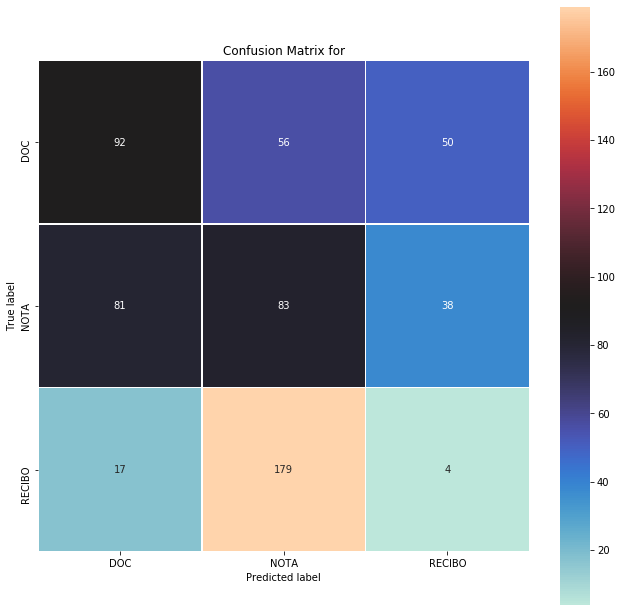

In [343]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [329]:
len3=len(test1)
test1['result1']=""
for i in range(len3):
    test1['result1'][i]=lr_results[i]

In [330]:
test1

,body,label,name,label1,result1
0,N mero cia Nota PREFEITURA MUNICIPAL DE cAMPIN...,NOTA,2019-04-02_13-54-53-1554224093_E_1421_2388167,0,NOTA
1,Esta nota fiscal n o foi assinada digitalmente...,NOTA,2019-06-24_17-15-48-1561407348_E_2007_5635819,0,NOTA
2,NFS e Nota Fiscal de Servi os eletr nica NFS ...,NOTA,2019-05-06_14-03-26-1557162206_E_2007_8892151,0,NOTA
3,PREFEITURA MUNICIPAL DE ARACRUZ\nSECRETARIA MU...,NOTA,2019-05-27_10-24-33-1558963473_E_2007_9225051,0,DOC
4,NFS e Nota Fiscal de Servi os eletr nica P gi...,NOTA,2018-01-03_16-26_6231938,0,DOC
...,...,...,...,...,...
595,R ebefm de TECMSUM c M RciG E ma smm n m DIAG...,RECIBO,2019-05-21_15-58-13-1558465093_E_1421_6524231,2,DOC
596,N Fatura SPG LAW Castro Barros Sobral Gomes Ad...,RECIBO,2019-05-03_12-36-35-1556897795_E_1970_1530117-2,2,DOC
597,cAsTRO BARROS ADVOGADOS S o Paulo de Abril de ...,RECIBO,2019-05-03_12-36-31-1556897791_E_1970_2102950-1,2,DOC
598,cAsTRO BARROS ADVOGADOS S o Paulo de Abril de ...,RECIBO,2019-05-03_12-36-37-1556897797_E_1970_8178017-1,2,DOC
